In [11]:
import sys
sys.path.append("/home/zoker/quict/")

import torch
import time
import tqdm
import numpy as np
import random

from QuICT.algorithm.quantum_machine_learning.utils import Hamiltonian
from QuICT.algorithm.quantum_machine_learning.model.VQA import VQENet, QAOANet
from QuICT.algorithm.quantum_machine_learning.model.QNN import QuantumNet
from QuICT.algorithm.quantum_machine_learning.utils.ml_utils import *
from QuICT.simulation.state_vector import ConstantStateVectorSimulator
from QuICT.algorithm.tools.drawer.graph_drawer import *

In [8]:
def random_edges(n_nodes, n_edges):
        assert n_nodes >= 2
        assert n_edges <= n_nodes * (n_nodes - 1) / 2
        edges = []
        nodes = np.arange(n_nodes)
        while len(edges) < n_edges:
            edge = list(np.random.choice(nodes, 2, replace=False))
            if edge in edges or edge[::-1] in edges:
                continue
            edges.append(edge)
        return edges


p = 4           # 量子电路层数
MAX_ITERS = 100 # 最大迭代次数
LR = 0.1        # 梯度下降的学习率
SEED = 0        # 随机数种子

set_seed(SEED)  # 设置全局随机种子

n = 10
n_edges = 15
edges = random_edges(n, n_edges)

In [9]:
def maxcut_hamiltonian(edges):
    pauli_list = []
    for edge in edges:
        pauli_list.append([-1.0, "Z" + str(edge[0]), "Z" + str(edge[1])])
    hamiltonian = Hamiltonian(pauli_list)

    return hamiltonian

H = maxcut_hamiltonian(edges)
H.pauli_str

[[-1.0, 'Z2', 'Z8'],
 [-1.0, 'Z3', 'Z5'],
 [-1.0, 'Z2', 'Z3'],
 [-1.0, 'Z6', 'Z1'],
 [-1.0, 'Z5', 'Z2'],
 [-1.0, 'Z1', 'Z8'],
 [-1.0, 'Z0', 'Z9'],
 [-1.0, 'Z7', 'Z8'],
 [-1.0, 'Z1', 'Z2'],
 [-1.0, 'Z9', 'Z7'],
 [-1.0, 'Z4', 'Z9'],
 [-1.0, 'Z4', 'Z6'],
 [-1.0, 'Z5', 'Z9'],
 [-1.0, 'Z0', 'Z5'],
 [-1.0, 'Z1', 'Z4']]

In [10]:
qaoa_net = QAOANet(n_qubits=n, p=p, hamiltonian=H)
optim = torch.optim.Adam([dict(params=qaoa_net.parameters(), lr=LR)])

# 开始训练
qaoa_net.train()
loader = tqdm.trange(MAX_ITERS, desc="Training", leave=True)
for it in loader:
    optim.zero_grad()
    state = qaoa_net()
    loss = qaoa_net.loss_func(state)
    loss.backward()
    optim.step()
    loader.set_postfix(loss=loss.item())

Training: 100%|██████████| 100/100 [03:06<00:00,  1.86s/it, loss=-5.93]


2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26dea3288d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26ded19a8d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26dee3b08d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26deffb28d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26df18588d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26df2fd28d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26df4a768d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | Initial Quantum Circuit circuit_26df61648d4e11ed9857156c50793f1a with 10 qubits.
2023-01-06 07:10:31 | circuit | INFO | I

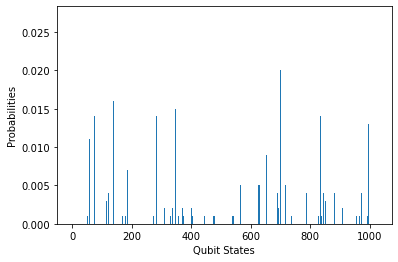

In [12]:
shots = 1000

qaoa_cir = qaoa_net.construct_circuit()
simulator = ConstantStateVectorSimulator()
simulator.vector = state.cpu().detach().numpy()
simulator.circuit = qaoa_cir
simulator._qubits = qaoa_cir.width()
prob = simulator.sample(shots)

plt.figure()
plt.xlabel("Qubit States")
plt.ylabel("Probabilities")
plt.bar(range(len(prob)), np.array(prob) / shots)
plt.savefig("/home/zoker/quict/Probabilities.png", transparent = True)
plt.show()

In [13]:
solution = prob.index(max(prob))
solution_bit = ("{:0" + str(n) + "b}").format(solution)
solution_bit

'1010101100'

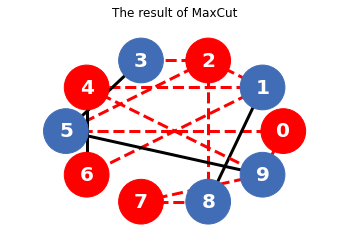

In [15]:
draw_maxcut_result(list(range(10)), edges, solution_bit, save_path="/home/zoker/quict")

### QUICT - QAOA

2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb5e934776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb604e6776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb60e8c776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb62458776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb63984776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb64dde776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb66292776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | Initial Quantum Circuit circuit_9bb67656776111edaafb6d714a15b590 with 10 qubits.
2022-12-09 09:34:22 | circuit | INFO | I

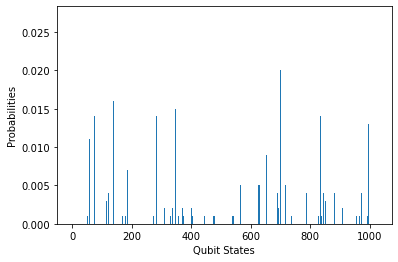

result:  [(2, 8), (2, 3), (6, 1), (5, 2), (0, 9), (7, 8), (1, 2), (9, 7), (4, 9), (0, 5), (1, 4)]


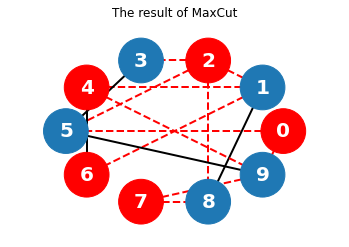

In [16]:
maxcut = MaxCut(n, edges)
start = time.time()
max_cut_num, cut_edges = maxcut.solve_maxcut(p=4, plot_prob=True, max_iters=100)
print("result: ", cut_edges)
maxcut.draw_result()